## first importent in the create ai based chatbot was workflow

In [1]:
!pip install langgraph langsmith


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install langchain langchain_groq langchain_community

  Using cached langchain_groq-0.2.4-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 130.4 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 174.3 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 215.3 kB/s eta 0:00:00
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic_settings-2.7.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached attrs-25.1.0-py3-none-any.wh


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#to load the env file 
!pip install python-dotenv


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#import the nessasory api keys
from dotenv import load_dotenv

load_dotenv()


import os
groq_api_key = os.environ['groq_api']
langsmith_api = os.environ['langsmith']
project_name = os.environ['project_name']

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 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 langgraph_learning


In [6]:
#set up the langsmith tracking setup

import os
os.environ["LANGCHAIN_API_KEY"] = langsmith_api
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]= project_name

In [7]:
#declare the llm 

from langchain_groq import ChatGroq

llm = ChatGroq(groq_api_key=groq_api_key,model_name="llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001B193264290>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001B1932652E0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building Chatbot Using Langgraph

In [8]:
# nessasory packages for the langgraph was 

from typing import Annotated                          # this was datatype for declare the structure datatype
from typing_extensions import TypedDict               # inside the class we want to specify the Typedict to declare the class was type of dict
from langgraph.graph import START,END,StateGraph      # for here we are using the stategrap for store the message and pass the message one node to another node
from langgraph.graph.message import add_messages      # this add_message was append the message into the class of state

In [10]:
# declare the class of the state


class Store_message(TypedDict):
    #  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)

    #syntax for declare the message list inside this list was in the type of dict type 
    message:Annotated[list,add_messages]

#create the state by using the stategrap function

graph_builder = StateGraph(Store_message)
graph_builder

In [11]:
# now create the function that mean create the node here i am takeing the only one node that will call the llm 

def chatbot_small_llm(state:Store_message):     # here state was contan the store_message class
    return{"message":llm.invoke(state["message"])}    # this was invoke the llm using rhe message and store into the store_message function



In [20]:
#add the node for chatbot_small_llm

graph_builder.add_node("chatbot_small_llm",chatbot_small_llm)

Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.


ValueError: Node `chatbot_small_llm` already present.

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


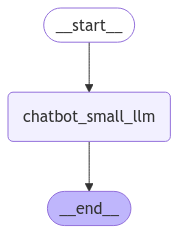

In [15]:
# add the ediges in graph

graph_builder.add_edge(START,"chatbot_small_llm")      # this chatbot_small_llm was the funciton name 
graph_builder.add_edge("chatbot_small_llm",END)


# after give the add_node, add_edgies, add_condect etc now we want to compail it


graph = graph_builder.compile()
graph

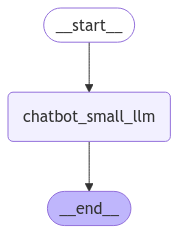

In [16]:
# to display the workflow in image

from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

## now exicute the code 


In [19]:
while True:
    user_input = input("enter the quary: ")
    if user_input == "b":
        break
    for trash in graph.stream({"message":("user",user_input)}):
        print(trash.values())
        for trash1 in trash.values():
            print(trash1["message"])
            print("assistant", trash1["message"].content)


dict_values([{'message': AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.020833333, 'prompt_time': 0.001740815, 'queue_time': 0.125292964, 'total_time': 0.022574148}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-2469725c-646c-4e87-82ea-f12f9839445c-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})}])
content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.020833333, 'prompt_time': 0.001740815, 'queue_time': 0.125292964, 'total_time': 0.022574148}, 'model_name': 'llama3-8b-8192', 'syste